In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
df = pd.read_excel('Silver_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

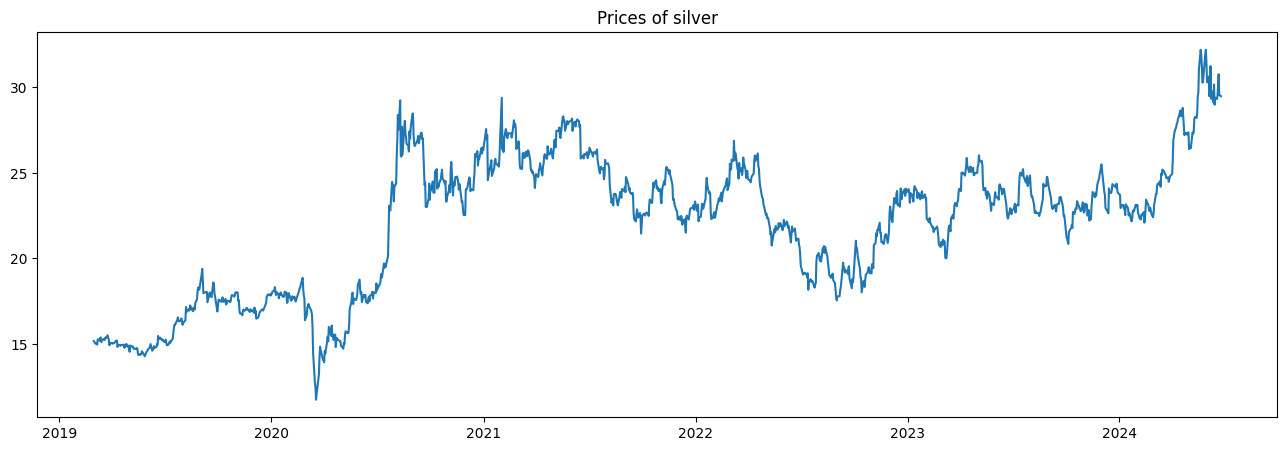

In [6]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of silver')
    plt.show()

In [7]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,15.555000,15.575000,15.080000,15.169000,585
2019-03-04,2019-03-04,15.170000,15.205000,15.005000,15.017000,317
2019-03-05,2019-03-05,15.025000,15.075000,15.005000,15.020000,222
2019-03-06,2019-03-06,15.025000,15.025000,14.975000,15.003000,25
2019-03-07,2019-03-07,15.025000,15.025000,14.920000,14.960000,8
...,...,...,...,...,...,...
2024-06-17,2024-06-17,29.325001,29.325001,29.325001,29.325001,0
2024-06-18,2024-06-18,29.004999,29.504999,28.955000,29.504999,66
2024-06-20,2024-06-20,29.500000,30.775999,29.500000,30.775999,20
2024-06-21,2024-06-21,30.500000,30.510000,29.573000,29.573000,20


In [8]:
# Split dataset 

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.16357, saving model to save_model_7_2_1.keras
17/17 - 3s - 180ms/step - loss: 0.1636
Epoch 2/80

Epoch 2: loss improved from 0.16357 to 0.05823, saving model to save_model_7_2_1.keras
17/17 - 1s - 49ms/step - loss: 0.0582
Epoch 3/80

Epoch 3: loss improved from 0.05823 to 0.04523, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0452
Epoch 4/80

Epoch 4: loss improved from 0.04523 to 0.04287, saving model to save_model_7_2_1.keras
17/17 - 1s - 48ms/step - loss: 0.0429
Epoch 5/80

Epoch 5: loss improved from 0.04287 to 0.04124, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0412
Epoch 6/80

Epoch 6: loss improved from 0.04124 to 0.04054, saving model to save_model_7_2_1.keras
17/17 - 1s - 53ms/step - loss: 0.0405
Epoch 7/80

Epoch 7: loss did not improve from 0.04054
17/17 - 1s - 49ms/step - loss: 0.0414
Epoch 8/80

Epoch 8: loss improved from 0.04054 to 0.04040, saving model to save_model_7_2_1.keras


In [13]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (836, 1)
Predicted y_train shape: (836, 1)


In [14]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [15]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [17]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8582903742790222], [0.855407178401947], [0.851546049118042], [0.8469502329826355], [0.8421036005020142], [0.8371918797492981], [0.8323123455047607], [0.8275256752967834], [0.8228704929351807], [0.8183709979057312], [0.814039945602417], [0.8098829984664917], [0.8059009909629822], [0.8020906448364258], [0.798446774482727], [0.7949625849723816], [0.791628897190094], [0.7884366512298584], [0.7853757739067078], [0.7824369072914124], [0.7796102166175842], [0.7768862247467041], [0.7742565870285034], [0.771713376045227], [0.7692499160766602], [0.766859769821167], [0.7645378708839417], [0.762279748916626], [0.7600812911987305], [0.7579396367073059]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [19]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.30420548]
 [29.24518646]
 [29.16614913]
 [29.07207277]
 [28.97286219]
 [28.87231926]
 [28.77243518]
 [28.67445203]
 [28.57916044]
 [28.48705576]
 [28.39839911]
 [28.3133064 ]
 [28.23179469]
 [28.1537969 ]
 [28.07920687]
 [28.0078855 ]
 [27.9396449 ]
 [27.87429962]
 [27.81164346]
 [27.75148485]
 [27.69362249]
 [27.63786237]
 [27.58403368]
 [27.53197414]
 [27.48154711]
 [27.43262081]
 [27.38509154]
 [27.33886777]
 [27.29386534]
 [27.25002567]]


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

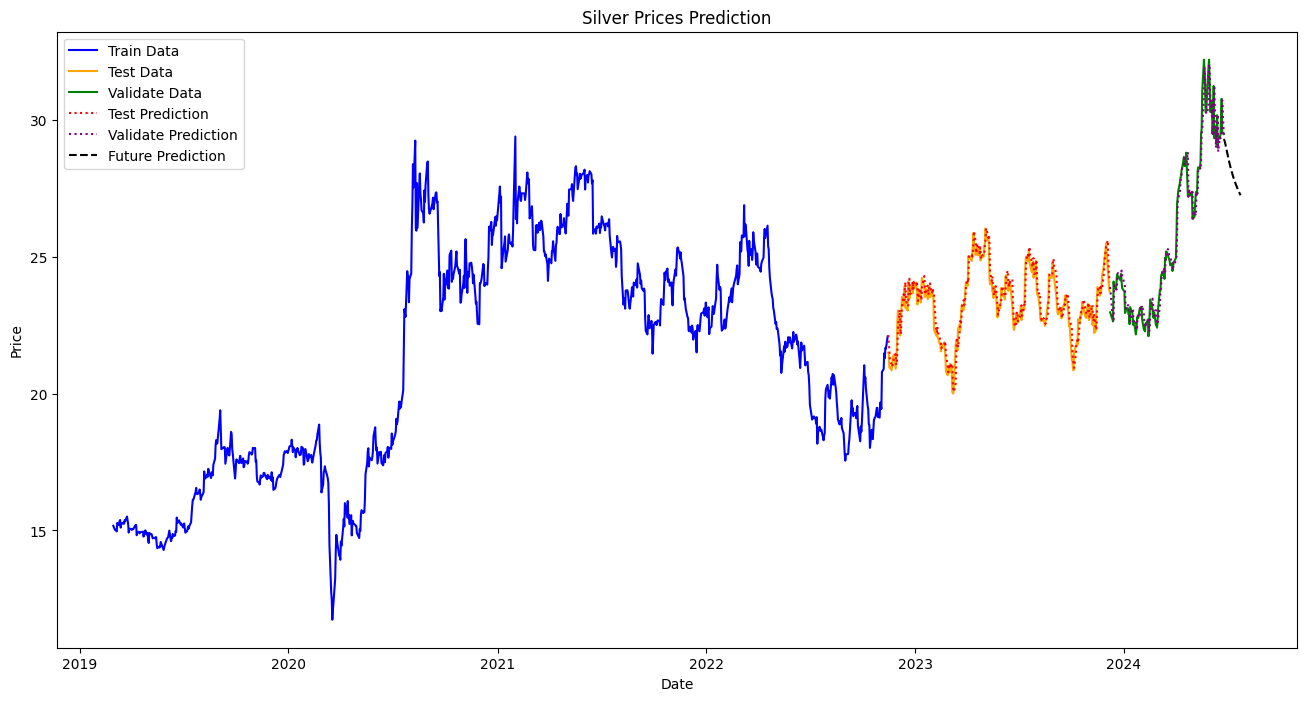

In [21]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 1.2399364643136834
Lower Bound of Future Prediction: [[28.06426902]
 [28.00524999]
 [27.92621267]
 [27.8321363 ]
 [27.73292573]
 [27.63238279]
 [27.53249871]
 [27.43451557]
 [27.33922397]
 [27.2471193 ]
 [27.15846265]
 [27.07336993]
 [26.99185823]
 [26.91386044]
 [26.8392704 ]
 [26.76794904]
 [26.69970844]
 [26.63436316]
 [26.57170699]
 [26.51154839]
 [26.45368602]
 [26.3979259 ]
 [26.34409721]
 [26.29203768]
 [26.24161065]
 [26.19268435]
 [26.14515507]
 [26.09893131]
 [26.05392888]
 [26.0100892 ]]
Upper Bound of Future Prediction: [[30.54414195]
 [30.48512292]
 [30.4060856 ]
 [30.31200923]
 [30.21279865]
 [30.11225572]
 [30.01237164]
 [29.91438849]
 [29.8190969 ]
 [29.72699223]
 [29.63833558]
 [29.55324286]
 [29.47173116]
 [29.39373336]
 [29.31914333]
 [29.24782196]
 [29.17958137]
 [29.11423609]
 [29.05157992]
 [28.99142131]
 [28.93355895]
 [28.87779883]
 [28.82397014]
 [28.77191061]
 [28.72148358]
 [28.67255728]
 [28.625028  ]
 [28.57880424]
 [28.5338018 ]
 [28.48996

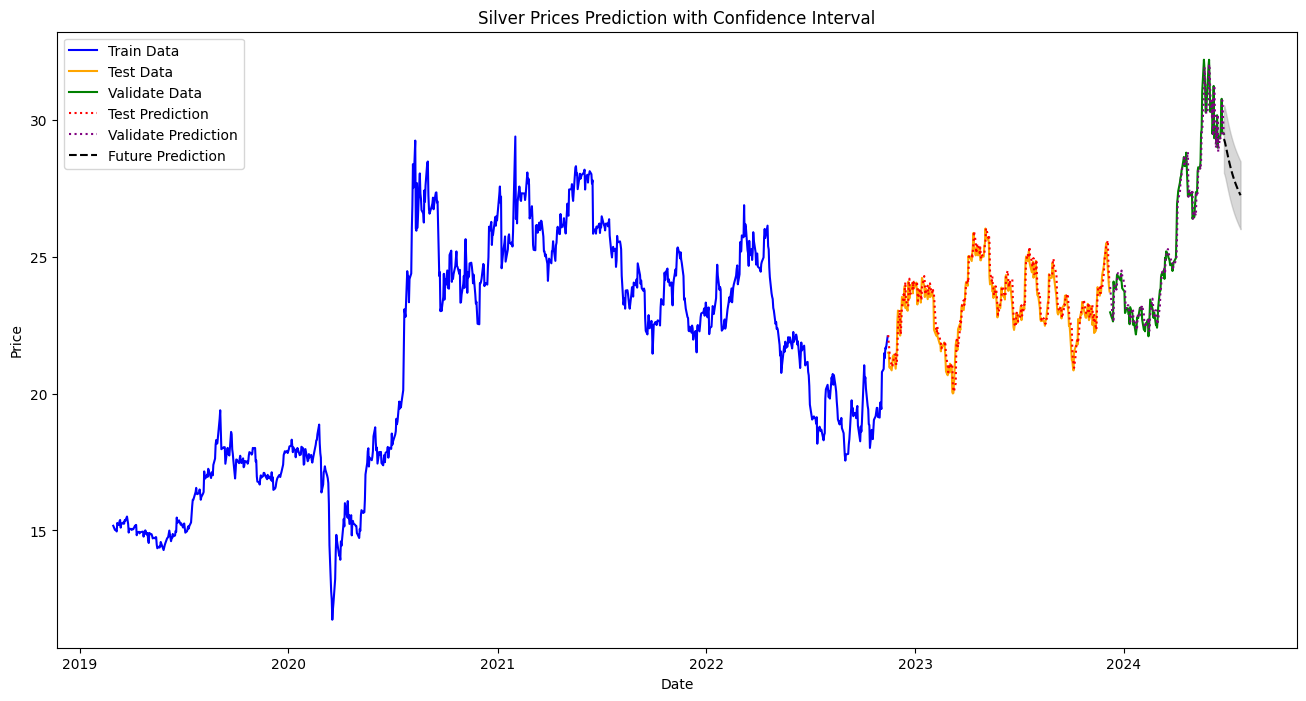

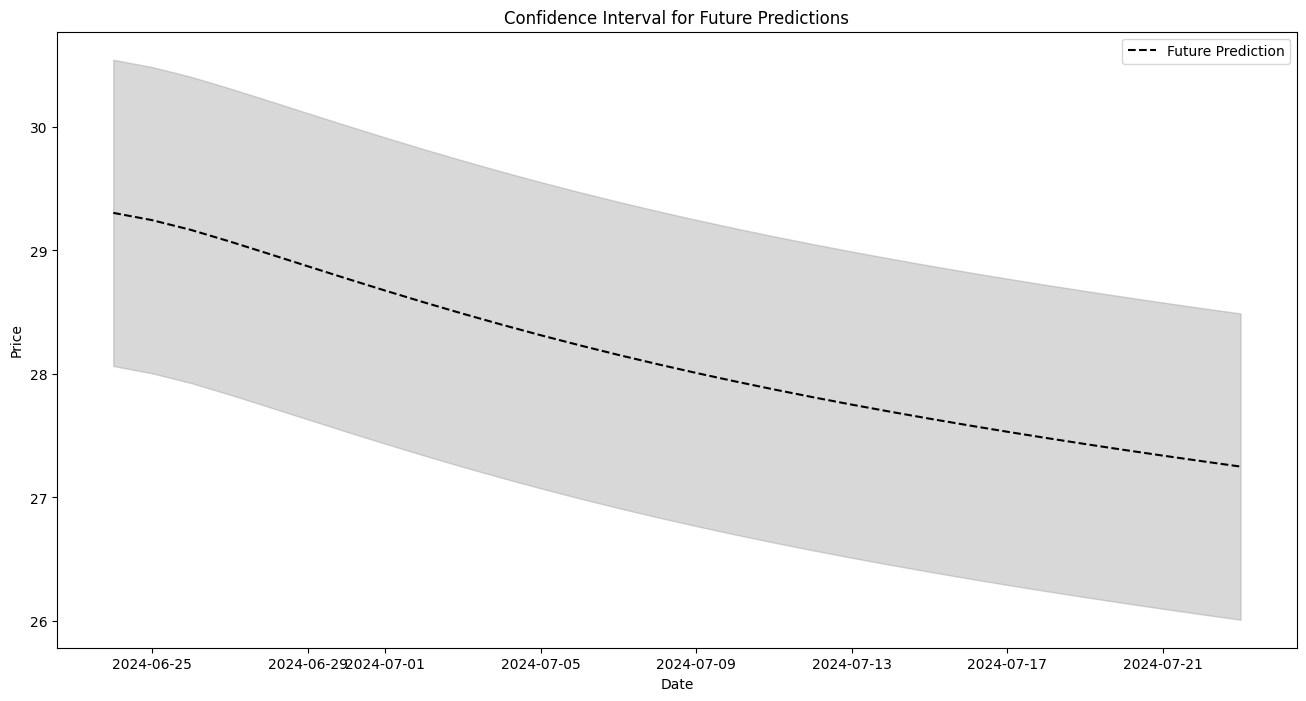

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [23]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.31462628653879915
MAPE:  1.3607515751995534
RMSE:  0.4081787500149601

** Validate **
MAE:  0.3821990542941621
MAPE:  1.4418381051890579
RMSE:  0.551463917261112


In [24]:
# Split dataset 6-3-1

In [25]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [26]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [27]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.22941, saving model to save_model_6_3_1.keras
15/15 - 3s - 195ms/step - loss: 0.2294
Epoch 2/80

Epoch 2: loss improved from 0.22941 to 0.07602, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0760
Epoch 3/80

Epoch 3: loss improved from 0.07602 to 0.04983, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0498
Epoch 4/80

Epoch 4: loss did not improve from 0.04983
15/15 - 1s - 44ms/step - loss: 0.0586
Epoch 5/80

Epoch 5: loss improved from 0.04983 to 0.04366, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0437
Epoch 6/80

Epoch 6: loss did not improve from 0.04366
15/15 - 1s - 44ms/step - loss: 0.0509
Epoch 7/80

Epoch 7: loss did not improve from 0.04366
15/15 - 1s - 44ms/step - loss: 0.0444
Epoch 8/80

Epoch 8: loss improved from 0.04366 to 0.04050, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0405
Epoch 9/80

Epoch 9: loss improved from 0.04050 to

In [29]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [30]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [31]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [33]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8176316618919373], [0.777592122554779], [0.7452071905136108], [0.7209389805793762], [0.7012043595314026], [0.6828407645225525], [0.6645086407661438], [0.6462236642837524], [0.6285301446914673], [0.6119512319564819], [0.5967832207679749], [0.5831011533737183], [0.5708345770835876], [0.5598429441452026], [0.5499638915061951], [0.5410386323928833], [0.5329209566116333], [0.5254803895950317], [0.5186013579368591], [0.5121824145317078], [0.506135106086731], [0.5003831386566162], [0.4948618710041046], [0.48951753973960876], [0.48430684208869934], [0.4791954457759857], [0.47415775060653687], [0.46917539834976196], [0.46423614025115967], [0.4593334197998047]]


In [34]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [35]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[28.47192155]
 [27.6523121 ]
 [26.98939247]
 [26.49262216]
 [26.08865442]
 [25.71275159]
 [25.33749298]
 [24.96319947]
 [24.60101309]
 [24.26164271]
 [23.95115348]
 [23.67108153]
 [23.41998469]
 [23.19498594]
 [22.99276171]
 [22.81006164]
 [22.6438928 ]
 [22.49158437]
 [22.35077058]
 [22.2193748 ]
 [22.09558638]
 [21.97784359]
 [21.86482323]
 [21.75542476]
 [21.64876177]
 [21.54413147]
 [21.44100984]
 [21.33902108]
 [21.23791446]
 [21.13755576]]


In [36]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

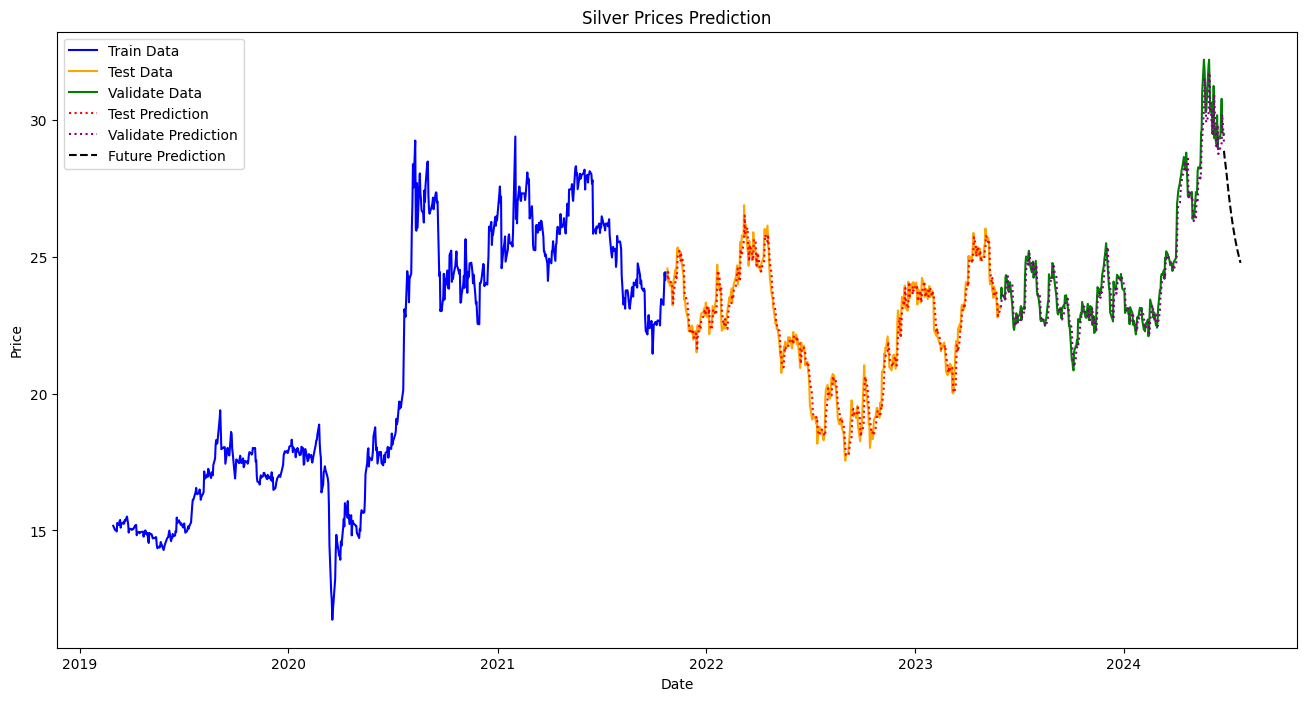

In [57]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 3.9940585427792508
Lower Bound of Future Prediction: [[24.47786301]
 [23.65825355]
 [22.99533392]
 [22.49856361]
 [22.09459588]
 [21.71869305]
 [21.34343444]
 [20.96914093]
 [20.60695454]
 [20.26758416]
 [19.95709494]
 [19.67702299]
 [19.42592615]
 [19.2009274 ]
 [18.99870317]
 [18.8160031 ]
 [18.64983425]
 [18.49752583]
 [18.35671204]
 [18.22531625]
 [18.10152784]
 [17.98378505]
 [17.87076469]
 [17.76136622]
 [17.65470322]
 [17.55007293]
 [17.4469513 ]
 [17.34496254]
 [17.24385591]
 [17.14349722]]
Upper Bound of Future Prediction: [[32.4659801 ]
 [31.64637064]
 [30.98345101]
 [30.4866807 ]
 [30.08271296]
 [29.70681013]
 [29.33155152]
 [28.95725801]
 [28.59507163]
 [28.25570125]
 [27.94521203]
 [27.66514008]
 [27.41404323]
 [27.18904448]
 [26.98682025]
 [26.80412018]
 [26.63795134]
 [26.48564292]
 [26.34482912]
 [26.21343334]
 [26.08964492]
 [25.97190214]
 [25.85888177]
 [25.7494833 ]
 [25.64282031]
 [25.53819002]
 [25.43506839]
 [25.33307962]
 [25.231973  ]
 [25.13161

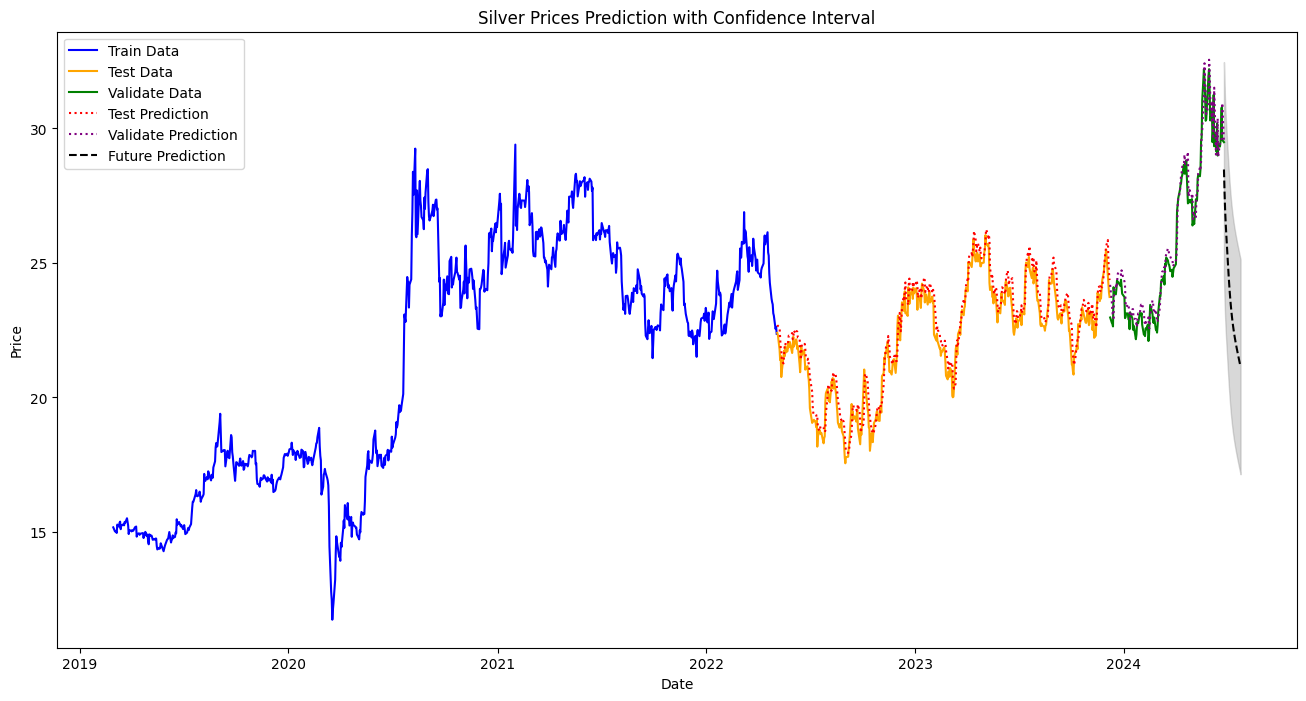

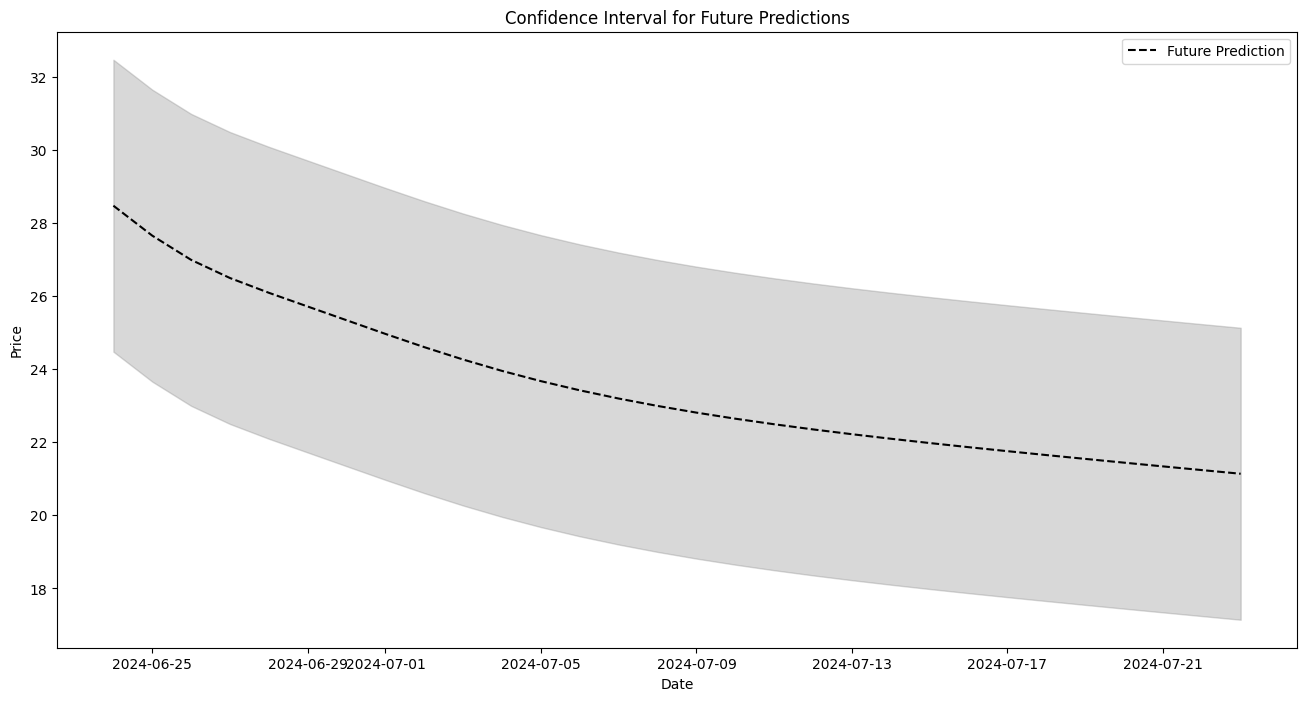

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [39]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.4339055468019403
MAPE:  1.9852488342841657
RMSE:  0.5338293717469637

** Validate **
MAE:  0.47151109200936786
MAPE:  1.820322238196596
RMSE:  0.6081092453655924


In [40]:
# Split dataset 5-3-2 

In [41]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [42]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [43]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [44]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.23900, saving model to save_model_5_3_2.keras
12/12 - 3s - 241ms/step - loss: 0.2390
Epoch 2/80

Epoch 2: loss improved from 0.23900 to 0.08446, saving model to save_model_5_3_2.keras
12/12 - 1s - 45ms/step - loss: 0.0845
Epoch 3/80

Epoch 3: loss improved from 0.08446 to 0.05729, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0573
Epoch 4/80

Epoch 4: loss improved from 0.05729 to 0.04680, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0468
Epoch 5/80

Epoch 5: loss improved from 0.04680 to 0.04378, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0438
Epoch 6/80

Epoch 6: loss improved from 0.04378 to 0.04249, saving model to save_model_5_3_2.keras
12/12 - 1s - 50ms/step - loss: 0.0425
Epoch 7/80

Epoch 7: loss improved from 0.04249 to 0.04101, saving model to save_model_5_3_2.keras
12/12 - 1s - 48ms/step - loss: 0.0410
Epoch 8/80

Epoch 8: loss did not improve from 0.04101


In [45]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [46]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [47]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [48]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.552808975886671, 0.556668211708967, 0.5357107665905421, 0.5178308891956818, 0.5206643312286188, 0.5150463654786148, 0.5290669138734347, 0.5272593588076007, 0.536101554051035, 0.5061553450970546, 0.5176354954654352, 0.5460185545774427, 0.5717634722090155, 0.5554958493274871, 0.5430385439523846, 0.538837252629977, 0.5488030782945099, 0.5267220027549859, 0.5270151399392287, 0.5214948244654753, 0.5340009549787037, 0.5576452735379447, 0.588373150590656, 0.5875915756696695, 0.6124571749262602, 0.6172447406171524, 0.6157303227355608, 0.6241816373407572, 0.6086467642420899, 0.6460184940119087, 0.6418661210053711, 0.657791874742276, 0.6524669529987694, 0.6462628060580258, 0.6447483881764338, 0.6406448403080212, 0.6329750074460663, 0.6355642306106315, 0.6227649629131615, 0.6297019528145105, 0.6381045354593264, 0.6457742751435367, 0.6872984710976382, 0.7430385159990613, 0.7525646358872313, 0.7652661601307063, 0.7805079892228759, 0.7892525341900589, 0.7926721574137359, 0.80317533913088

In [49]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8373032808303833], [0.8267876505851746], [0.8183286786079407], [0.8103232383728027], [0.801613986492157], [0.7921810150146484], [0.7824643850326538], [0.7728548645973206], [0.7635533809661865], [0.7546178102493286], [0.7460415959358215], [0.7378059029579163], [0.7298983335494995], [0.722313404083252], [0.7150480151176453], [0.708096981048584], [0.7014527320861816], [0.6951043605804443], [0.6890392303466797], [0.6832439303398132], [0.6777045130729675], [0.6724076867103577], [0.6673398613929749], [0.6624883413314819], [0.6578407287597656], [0.6533854603767395], [0.6491118669509888], [0.645009458065033], [0.6410687565803528], [0.6372812390327454]]


In [50]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [51]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[28.87459964]
 [28.65934466]
 [28.48618949]
 [28.32231811]
 [28.1440397 ]
 [27.95094676]
 [27.75204732]
 [27.55534042]
 [27.36493903]
 [27.18202787]
 [27.00647275]
 [26.83788809]
 [26.67602013]
 [26.52075661]
 [26.37203408]
 [26.2297464 ]
 [26.09373861]
 [25.96378743]
 [25.8396342 ]
 [25.7210044 ]
 [25.60761251]
 [25.49918647]
 [25.39544807]
 [25.29613744]
 [25.2010008 ]
 [25.10980145]
 [25.02232098]
 [24.93834467]
 [24.8576785 ]
 [24.78014801]]


In [52]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

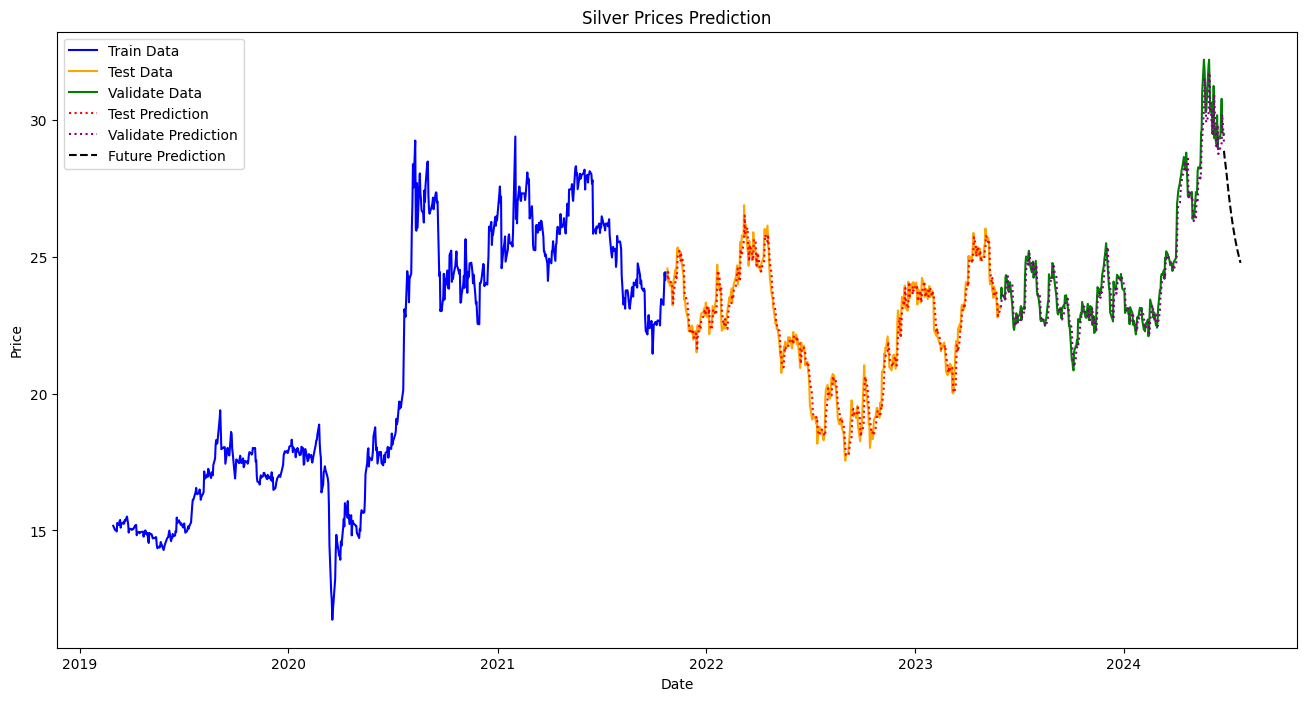

In [58]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

Margin of Error: 2.443270181900423
Lower Bound of Future Prediction: [[26.43132945]
 [26.21607448]
 [26.04291931]
 [25.87904793]
 [25.70076952]
 [25.50767657]
 [25.30877714]
 [25.11207023]
 [24.92166884]
 [24.73875769]
 [24.56320257]
 [24.39461791]
 [24.23274995]
 [24.07748643]
 [23.9287639 ]
 [23.78647622]
 [23.65046843]
 [23.52051725]
 [23.39636402]
 [23.27773421]
 [23.16434233]
 [23.05591628]
 [22.95217789]
 [22.85286726]
 [22.75773062]
 [22.66653127]
 [22.5790508 ]
 [22.49507448]
 [22.41440832]
 [22.33687782]]
Upper Bound of Future Prediction: [[31.31786982]
 [31.10261484]
 [30.92945967]
 [30.76558829]
 [30.58730989]
 [30.39421694]
 [30.1953175 ]
 [29.9986106 ]
 [29.80820921]
 [29.62529806]
 [29.44974293]
 [29.28115828]
 [29.11929031]
 [28.96402679]
 [28.81530426]
 [28.67301658]
 [28.53700879]
 [28.40705761]
 [28.28290438]
 [28.16427458]
 [28.05088269]
 [27.94245665]
 [27.83871825]
 [27.73940763]
 [27.64427099]
 [27.55307163]
 [27.46559117]
 [27.38161485]
 [27.30094868]
 [27.223418

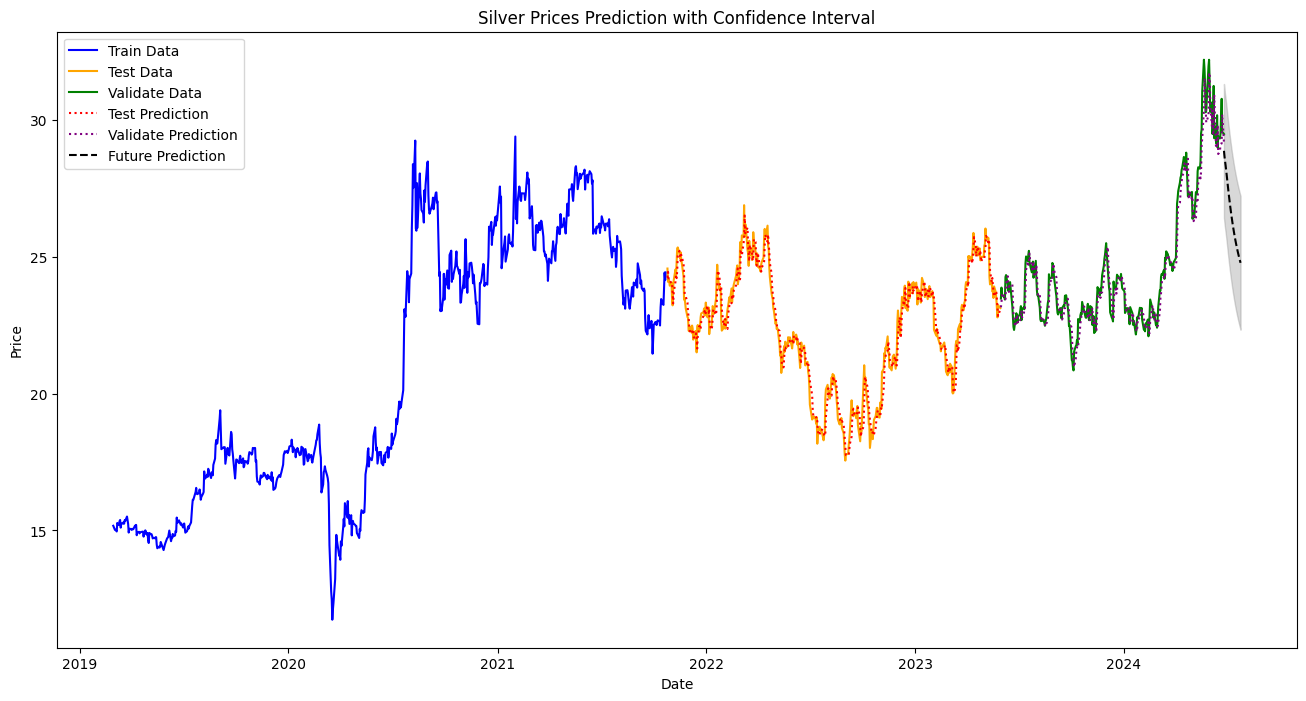

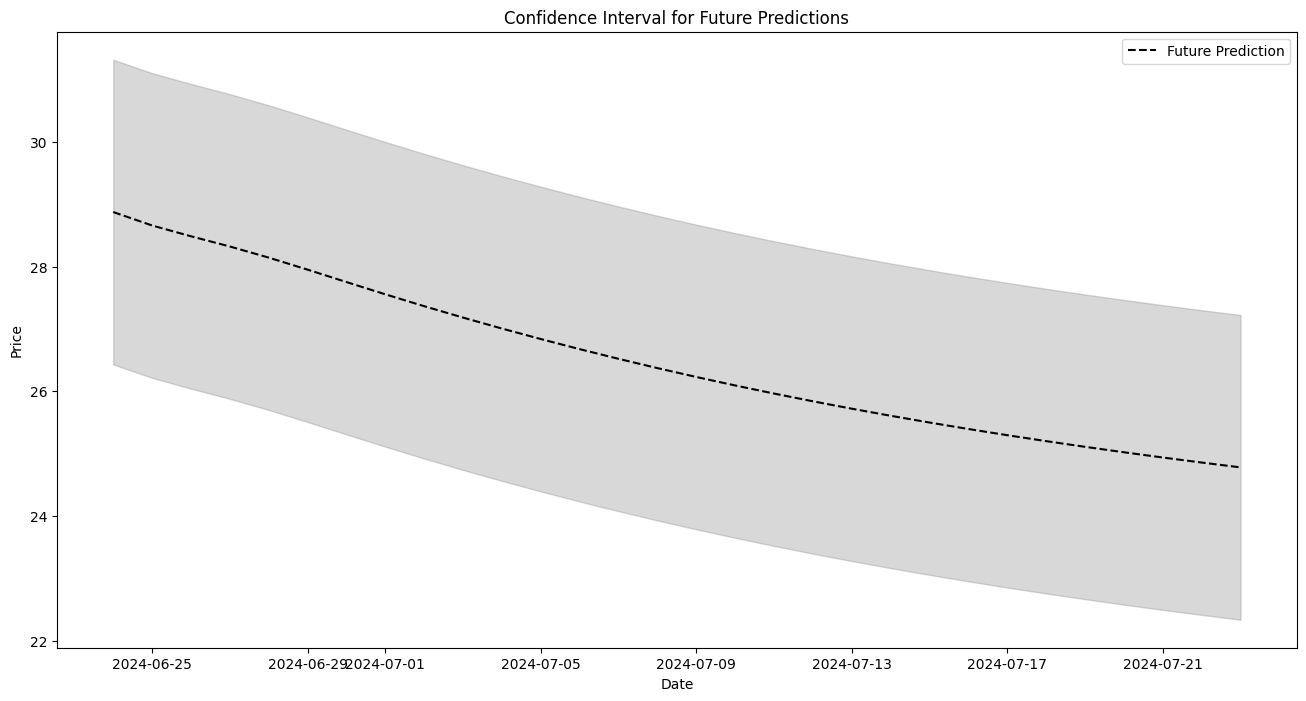

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Silver Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [55]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.34200903780739816
MAPE:  1.541643435173401
RMSE:  0.44876503731699874

** Validate **
MAE:  0.37837481854566873
MAPE:  1.5004767213160972
RMSE:  0.5143885706296263


In [60]:
import pandas as pd

# Original data
data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [0.3273, 0.5492, 0.3583],
    "Testing MAPE": ["1.4044%", "2.4954%", "1.6216%"],  # Add percentage signs
    "Testing RMSE": [0.4273, 0.6517, 0.4661],
    "Validation MAE": [0.4529, 0.6503, 0.3717],
    "Validation MAPE": ["1.6906%", "2.5117%", "1.4927%"],  # Add percentage signs
    "Validation RMSE": [0.6167, 0.7839, 0.4980],
    "Margin Of Error": [1.2399364643136834, 3.9940585427792508, 2.443270181900423],
    "Confidence Score": [0.9118880267656277, 0.6607339817503256, 0.8156626654384831],
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df.to_string(index=False))


Model Ratio  Testing MAE Testing MAPE  Testing RMSE  Validation MAE Validation MAPE  Validation RMSE  Margin Of Error  Confidence Score
 LSTM 7-2-1       0.3273      1.4044%        0.4273          0.4529         1.6906%           0.6167         1.239936          0.911888
 LSTM 6-3-1       0.5492      2.4954%        0.6517          0.6503         2.5117%           0.7839         3.994059          0.660734
 LSTM 5-3-2       0.3583      1.6216%        0.4661          0.3717         1.4927%           0.4980         2.443270          0.815663
